In [254]:
import numpy as np
import networkx as nx
from itertools import combinations as combo
import matplotlib.pyplot as plt

In [255]:
def find_subsets(X):
    """
    Finds All Possible Subsets Of A Set
    
    Parameters:
        X (set)
    
    Returns:
        pX (list)
    """
    pX = []
    for i in range(len(X)+1):
        set_i = list(combo(X,i))
        for item in set_i:
            pX.append(item)
    return pX

In [256]:
def build_imap(ordering,I):
    """
    Build Minimial I-Map
    Parameters:
        ordering (list)
        I (set of tuples)
        
    Returns:
        g (networkx graph)
    """
    # Define graph
    g = nx.DiGraph()
    for pos, i in enumerate(ordering):
        # Current candidate for parents of X_i
        U = tuple(ordering[:pos+1])
        # Get all possible subsets of U
        sub_U = find_subsets(U)

        # Loop through each subset of U
        for u_prime in sub_U:
            # Create independency check
            check_0 = tuple(set((i,)+tuple(set(ordering[:pos+1])-set(u_prime))))
            possible_parents = find_subsets(u_prime)[1:]
            # Check for all parents
            for p in possible_parents:
                # Check condition
                if u_prime != U and ((check_0,p) in I):
                    # Update U
                    U = u_prime
        # Add minimal edges
        for vertex in U:
            g.add_edge(vertex,i)
    return g
        

In [257]:
# Test case
# D - 1, I - 2, S - 3, G - 4, L - 5
I = {((1,2),()),((1,3),(2,)),((4,5),(1,)),((4,5),(2,)),((1,4),(2,)),
    ((1,5),(4,)),((2,4),(1,)),((2,5),(1,)),((3,4),(2,)),((2,1),()),((3,1),(2,)),((5,4),(1,)),((5,4),(2,)),((4,1),(2,)),
    ((5,1),(4,)),((4,2),(1,)),((5,2),(1,)),((4,3),(2,))}
X = [5,3,4,2,1]

In [258]:
g = build_imap(X,I)

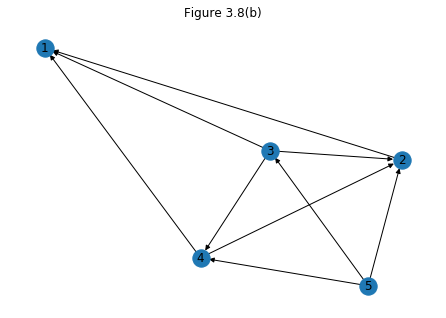

In [259]:
nx.draw(g,with_labels=True,pos=nx.spring_layout(g))
plt.title('Figure 3.8(b)')
plt.show()